In [32]:
import pandas as pd
import pylab as plt
import numpy as np
import seaborn
%matplotlib inline
from __future__ import division
import pprint
from collections import Counter

In [110]:
GP_peptides = 'CW5-162Chymo_GP_peptides.xlsx'
GP_proteins = 'CW5-162Chymo_GP_protein.xlsx'
WP = 'CW5-162Chymo_wholeP_protein.xlsx'
glycopeptide = 'CW5-162ChymoGlycanByonicPeptide.xlsx'
glycopeptide_GPFasta = 'CW5-162Chymo_Glycan_GPFasta.xlsx'
phosphopeptide = 'CW5-162Chymo_Phospho.xlsx'
chartpattern = 'CW5-162-ChymoGlycan_PatternChart.xlsx'

In [34]:
#### Whole Protein analysis on peptide level ####

In [35]:
dfwp = pd.read_excel(WP,sheetname='Sheet1' )

In [36]:
dfwp.head(1)

,Accession,Description,ΣCoverage,Σ# Proteins,Σ# Unique Peptides,Σ# Peptides,Σ# PSMs,A8: Area,B8: Area,C8: Area,...,"Coverage E(2,4)","# Peptides E(2,4)","# PSM E(2,4)","Score F(2,4)","Coverage F(2,4)","# Peptides F(2,4)","# PSM F(2,4)",# AAs,MW [kDa],calc. pI
0,P62937,Peptidyl-prolyl cis-trans isomerase A OS=Homo ...,85.45,7,18,22,263,1.180214e+08,55383192.421875,41948147.380208,...,76.97,28,44,89.056921,76.97,27,46,165,18.000886,7.811035


In [37]:
#dfwp1 = dfwp[['Accession', 'Description', 'A8: Area', 'B8: Area', 'C8: Area', 'Gene Name', 'GO Ontology']]
#dfwp1.columns = ['Accession', 'Description', 'control area', 'anti328 area', 'PMAI area', 'Gene Name', 'GO ontology']
dfwp1 = dfwp[['Accession', 'Description', 'A8: Area', 'B8: Area', 'C8: Area', 'D8: Area', 'E8: Area', 'F8: Area']]
dfwp1.columns = ['Accession', 'Description', '15miso area', '15manti area', '6hiso area' , '6hanti area', '18hiso area','18hanti area']

In [38]:
dfwp2 = dfwp1.replace(0,np.nan)
dfwp2 = dfwp1.replace(0,1)
dfwp2['wp_15manti_div_15miso'] =  np.log2(dfwp2['15manti area'] / dfwp2['15miso area'] )
dfwp2['wp_6hanti_div_6hiso'] = np.log2(dfwp2['6hanti area'] / dfwp2['6hiso area'])
dfwp2['wp_18hanti_div_18hiso'] = np.log2(dfwp2['18hanti area'] / dfwp2['18hiso area'])

if 'Accession' in dfwp2.columns:
    dfwp2.rename(columns={'Accession':'Protein Group Accessions'}, inplace=True)
dfwp2 = dfwp2.set_index(['Protein Group Accessions'])

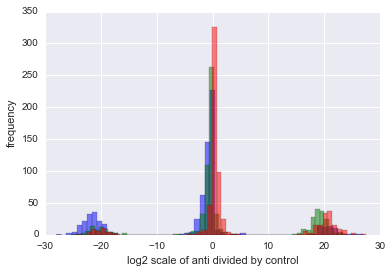

In [39]:
#ratio between anti and control, blue = 15m, green = 6h, red = 18h
dfwp2['wp_15manti_div_15miso'].hist(bins=60, alpha = 0.5, color = 'b')
dfwp2['wp_6hanti_div_6hiso'].hist(bins=60, alpha = 0.5, color = 'g')
dfwp2['wp_18hanti_div_18hiso'].hist(bins=60, alpha = 0.5, color = 'r')
plt.xlabel('log2 scale of anti divided by control')
plt.ylabel('frequency')

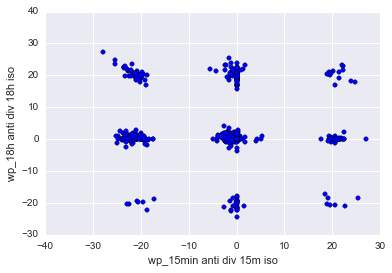

In [40]:
plt.scatter(dfwp2['wp_15manti_div_15miso'], dfwp2['wp_18hanti_div_18hiso'])
plt.xlabel('wp_15min anti div 15m iso')
plt.ylabel('wp_18h anti div 18h iso')

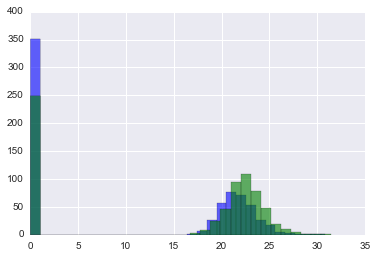

In [41]:
#raw area values between 15 anti (blue) and 15 iso (green)

np.log2(dfwp2['15manti area']).hist(bins=30, alpha = 0.6, color='b')
np.log2(dfwp2['15miso area']).hist(bins=30, alpha=0.6, color = 'g')
#plt.xlim([0,1000000000])

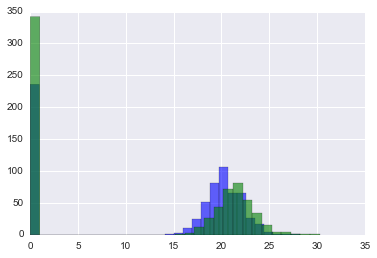

In [42]:
#6h anti in blue and 6h iso in green
np.log2(dfwp2['6hanti area']).hist(bins=30, alpha = 0.6, color='b')
np.log2(dfwp2['6hiso area']).hist(bins=30, alpha=0.6, color = 'g')
#plt.xlim([0,1000000000])

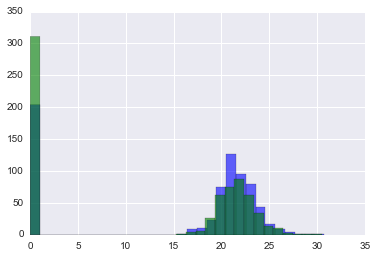

In [43]:
#18h anti in blue and 18h iso in green
np.log2(dfwp2['18hanti area']).hist(bins=30, alpha = 0.6, color='b')
np.log2(dfwp2['18hiso area']).hist(bins=30, alpha=0.6, color = 'g')
#plt.xlim([0,1000000000])

In [44]:
#### Glycoprotein level analysis, first on protein then on peptide level ####

In [45]:
dfGP = pd.read_excel(GP_proteins,sheetname='Sheet1')

In [46]:
dfGP1 = dfGP[['Accession', 'Description', 'A8: Area', 'B8: Area', 'C8: Area', 'D8: Area', 'E8: Area', 'F8: Area']]
dfGP1.columns = ['Accession', 'Description', '15miso area', '15manti area', '6hiso area' , '6hanti area', '18hiso area','18hanti area']

In [151]:
dfGP2 = dfGP1.replace(0,np.nan)
dfGP2 = dfGP1.replace(0,1)
dfGP2['GP_15manti_div_15miso'] =  np.log2(dfGP2['15manti area'] / dfGP2['15miso area'] )
dfGP2['GP_6hanti_div_6hiso'] = np.log2(dfGP2['6hanti area'] / dfGP2['6hiso area'])
dfGP2['GP_18hanti_div_18hiso'] = np.log2(dfGP2['18hanti area'] / dfGP2['18hiso area'])

if 'Accession' in dfGP2.columns:
    dfGP2.rename(columns={'Accession':'Protein Group Accessions'}, inplace=True)
dfGP2 = dfGP2.set_index(['Protein Group Accessions'])

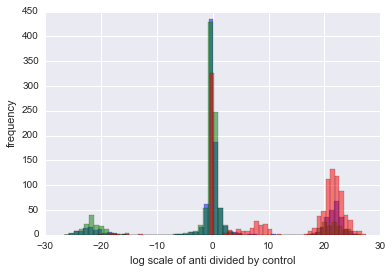

In [152]:
#ratio between anti and control, blue = 15m, green = 6h, red = 18h
dfGP2['GP_15manti_div_15miso'].hist(bins=60, alpha = 0.5, color = 'b')
dfGP2['GP_6hanti_div_6hiso'].hist(bins=60, alpha = 0.5, color = 'g')
dfGP2['GP_18hanti_div_18hiso'].hist(bins=60, alpha = 0.5, color = 'r')
plt.xlabel('log scale of anti divided by control')
plt.ylabel('frequency')

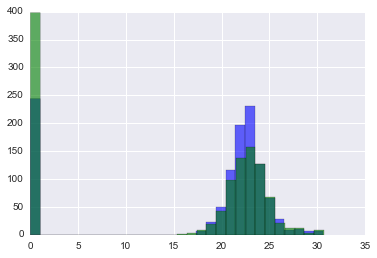

In [153]:
#raw area values between 15m anti (blue) and 15m iso (green)

np.log2(dfGP2['15manti area']).hist(bins=30, alpha = 0.6, color='b')
np.log2(dfGP2['15miso area']).hist(bins=30, alpha=0.6, color = 'g')
#plt.xlim([0,1000000000])

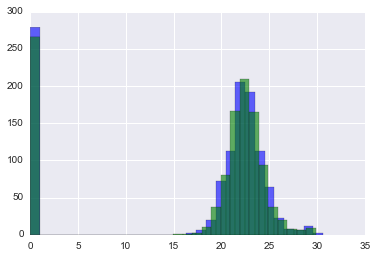

In [154]:
#6h anti in blue and 6h iso in green
np.log2(dfGP2['6hanti area']).hist(bins=30, alpha = 0.6, color='b')
np.log2(dfGP2['6hiso area']).hist(bins=30, alpha=0.6, color = 'g')
#plt.xlim([0,1000000000])

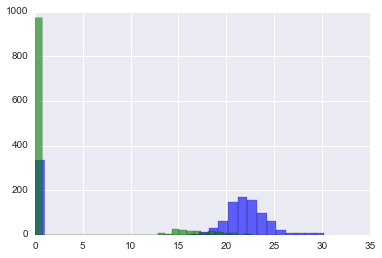

In [155]:
#18h anti in blue and 18h iso in green
np.log2(dfGP2['18hanti area']).hist(bins=30, alpha = 0.6, color='b')
np.log2(dfGP2['18hiso area']).hist(bins=30, alpha=0.6, color = 'g')
#plt.xlim([0,1000000000])

In [60]:
dfGP_pep = pd.read_excel(GP_peptides,sheetname='Sheet1' )

In [61]:
dfGP_pep.head(1)

,A2,A4,B2,B4,C2,C4,D2,D4,E2,E4,...,Charge,m/z [Da],MH+ [Da],ΔM [ppm],RT [min],First Scan,Last Scan,MS Order,Ions Matched,Spectrum File
0,NaN,NaN,NaN,NaN,NaN,NaN,High,NaN,NaN,NaN,...,3,888.085571,2662.242161,-3.953315,55.880092,13781,13781,MS2,0/0,5162_15m_anti328_chymo_GP.raw


In [62]:
#testing out the apply method to remove accessions after the semicolon
#pd.concat([df['Protein Group Accessions'], df['Protein Group Accessions'].apply(lambda x: str(x).split(';')[0])],axis=1)
dfGP_pep['Protein Group Accessions'] = dfGP_pep['Protein Group Accessions'].apply(lambda x: str(x).split(';')[0])
#some Protein Group Accessions have multiples. choose the first one only

df_filtered = dfGP_pep[['Sequence','Protein Group Accessions','Precursor Area','Spectrum File']]

In [63]:
f = {'Precursor Area':['count','sum','mean']}
dfGP_pep_group = df_filtered.groupby(['Spectrum File','Protein Group Accessions']).agg(f)

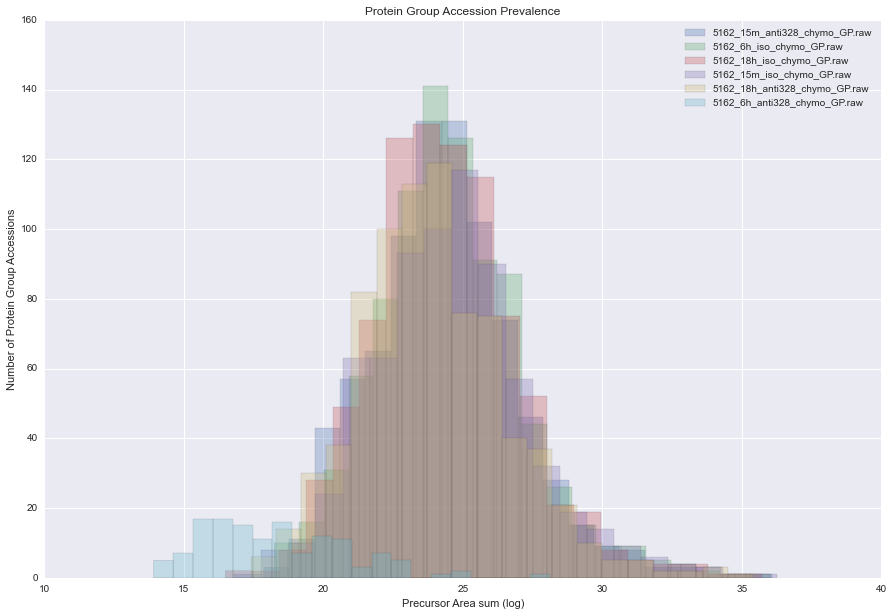

In [156]:
for val, spectrum_file in enumerate(dfGP_pep['Spectrum File'].unique()):
    np.log2(dfGP_pep_group.loc[spectrum_file].iloc[:,1]).hist(bins = 20, alpha = 0.3, figsize = (15,10), label = spectrum_file)
plt.legend()
plt.title('Protein Group Accession Prevalence')
plt.xlabel('Precursor Area sum (log)')
plt.ylabel('Number of Protein Group Accessions')


In [65]:
#### GLYCOPEPTIDE ANALYSIS ####

In [68]:
dfgp = pd.read_excel(glycopeptide,sheetname='Sheet1')
dfgp_GPFasta = pd.read_excel(glycopeptide_GPFasta,sheetname='Sheet1')

In [69]:
dfgp['Spectrum File'].unique()

array([u'5162_15m_anti328_chymo_glycan_scouting.raw',
       u'5162_15m_iso_chymo_glycan_scouting.raw',
       u'5162_6h_iso_chymo_glycan_include.raw',
       u'5162_15m_anti328_chymo_glycan_include.raw',
       u'5162_18h_iso_chymo_glycan_scouting.raw',
       u'5162_6h_anti328_chymo_glycan_include.raw',
       u'5162_6h_iso_chymo_glycan_scouting.raw',
       u'5162_18h_anti328_chymo_glycan_scouting.raw',
       u'5162_6h_anti328_chymo_glycan_scouting.raw',
       u'5162_18h_iso_chymo_glycan_include.raw',
       u'5162_18h_anti328_chymo_glycan_include.raw',
       u'5162_15m_iso_chymo_glycan_include.raw'], dtype=object)

In [70]:
original = dfgp['Spectrum File'].unique()
new = ['1_6hiso','0_18hiso', '0_6hiso', '1_15miso', '0_15manti', '0_15miso', '1_18hanti', '0_18hanti','1_15manti','1_18hiso','1_6hanti','0_6hanti']

#changing the Spectrum File name into something sensible
if dfgp['Spectrum File'][0] not in  new:
    alias = {original[idx]:new[idx] for idx in range(len(original))}
    dfgp = dfgp.replace({'Spectrum File': alias})

In [71]:
#replace nan with no value. shows that the sequence was picked up, but wasn't assigned a value
dfgp['Precursor Area'] = dfgp['Precursor Area'].replace(np.nan, 1)

In [72]:
#Splitting Spectrum File into Trial (e.g. PMAI, or, control) and Version (1,2,3)
#deprecated function
#dfgp = dfgp.join(pd.DataFrame(dfgp['Spectrum File'].str.split('_',1).tolist(),columns = ['Trial','Version']))

dfgp['Trial'] = dfgp['Spectrum File'].str[0]
dfgp['Version'] = dfgp['Spectrum File'].str[2:]

In [73]:
#create a dataframe, where sequence is not case sensitive
dfgp['Sequence'] = dfgp['Sequence'].str.upper()

In [157]:
def ratios(dfgp):
    dfgp_15miso = dfgp[dfgp['Version'] == '15miso']
    iso1_bytrial = dfgp_15miso.pivot_table(values='Precursor Area',index='Sequence',columns='Trial', aggfunc='mean')

    dfgp_15manti = dfgp[dfgp['Version'] == '15manti']
    anti1_bytrial = dfgp_15manti.pivot_table(values='Precursor Area',index='Sequence',columns='Trial', aggfunc='mean')

    dfgp_6hiso = dfgp[dfgp['Version'] == '6hiso']
    iso2_bytrial = dfgp_6hiso.pivot_table(values='Precursor Area',index='Sequence',columns='Trial', aggfunc='mean')
    
    dfgp_6hanti = dfgp[dfgp['Version'] == '6hanti']
    anti2_bytrial = dfgp_6hanti.pivot_table(values='Precursor Area',index='Sequence',columns='Trial', aggfunc='mean')
    
    dfgp_18hiso = dfgp[dfgp['Version'] == '18hiso']
    iso3_bytrial = dfgp_18hiso.pivot_table(values='Precursor Area',index='Sequence',columns='Trial', aggfunc='mean')

    dfgp_18hanti = dfgp[dfgp['Version'] == '18hanti']
    anti3_bytrial = dfgp_18hanti.pivot_table(values='Precursor Area',index='Sequence',columns='Trial', aggfunc='mean')

    return (anti1_bytrial / iso1_bytrial), (anti2_bytrial / iso2_bytrial), (anti3_bytrial / iso3_bytrial), np.log2(anti1_bytrial / iso1_bytrial), np.log2(anti2_bytrial / iso2_bytrial), np.log2(anti3_bytrial / iso3_bytrial)

In [158]:
#format the pivot tables
pd.options.display.float_format = '{:.2f}'.format

In [76]:
#dfgp2 is the index for glycan only sequences
dfgp2 = dfgp[dfgp['Glycan composition'].notnull()]

In [77]:
# number of HexNAz2Si unique sequences in the file
len(dfgp2['Sequence'].unique())

581

In [78]:
#glycan only peptides showing here
f = {'Precursor Area':['count','sum','mean']}
dfgp2.groupby(['Spectrum File','Sequence']).agg(f).head()

Precursor Area                        
                                           count         sum        mean
Spectrum File Sequence                                                  
0_15manti     AAAAAATQKIPPSSAPTVL              2 28154079.38 14077039.69
              AAAGLTTQTPANY                    1   943928.09   943928.09
              AAAPVPTTTL                       1  1849582.81  1849582.81
              AAPRPSPAISVSVSAPAFY              1  2125379.97  2125379.97
              AAPTGHPPTSGVEKVL                 2  2366213.44  1183106.72

In [79]:
dfgp2['Spectrum File'].unique()

array(['1_6hiso', '0_18hiso', '0_6hiso', '1_15miso', '0_15manti',
       '0_15miso', '1_18hanti', '0_18hanti', '1_15manti', '1_18hiso',
       '1_6hanti', '0_6hanti'], dtype=object)

In [80]:
# the p_c_ratio, o_c_ratio, p_c_logratio, and o_c_logratio are only on hexnaz2si filtered glycopeptides
#p_c_ratio, o_c_ratio, p_c_logratio, o_c_logratio =  ratios(dfgp)

ratio_15m, ratio_6h, logratio_18h, logratio_15m, logratio_6h, logratio_18h =  ratios(dfgp2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11870dc90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1187b1a50>]], dtype=object)

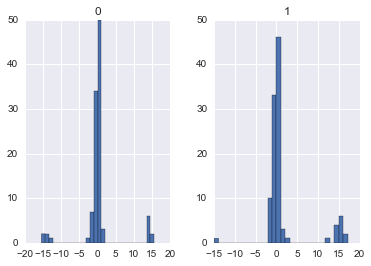

In [81]:
logratio_15m.hist(bins=30, )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10eef6610>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x111180410>]], dtype=object)

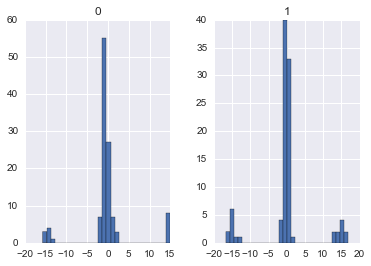

In [82]:
logratio_18h.hist(bins=30, )

In [83]:
#glycosylated sequences from all four trials in a pivot
group2_pivot = dfgp2.pivot_table(values='Precursor Area',index=['Protein Group Accessions'],columns=['Version'], aggfunc='sum')

In [84]:
group2_pivot.columns

Index([u'15manti', u'15miso', u'18hanti', u'18hiso', u'6hanti', u'6hiso'], dtype='object', name=u'Version')

In [85]:
ratio_15m = np.log2(group2_pivot.iloc[:,0]/ group2_pivot.iloc[:,1])
ratio_6h = np.log2(group2_pivot.iloc[:,4]/ group2_pivot.iloc[:,5])
ratio_18h = np.log2(group2_pivot.iloc[:,2]/ group2_pivot.iloc[:,3])

In [86]:
group3_pivot = group2_pivot.copy()
group3_pivot['glycan_ratio_15m'] = ratio_15m
group3_pivot['glycan_ratio_6h'] = ratio_6h
group3_pivot['glycan_ratio_18h'] = ratio_18h

In [87]:
group3_pivot.to_excel('group3_pivot.xlsx')

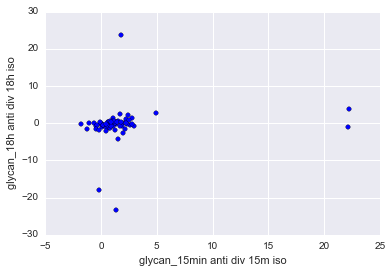

In [164]:
plt.scatter(group3_pivot['glycan_ratio_15m'], group3_pivot['glycan_ratio_18h'])
plt.xlabel('glycan_15min anti div 15m iso')
plt.ylabel('glycan_18h anti div 18h iso')

In [88]:
#### PHOSPHOPEPTIDE ANALYSIS ####

In [91]:
dfphos = pd.read_excel(phosphopeptide,sheetname='Sheet1')

In [92]:
dfphos2 = dfphos[dfphos.Modifications.str.contains('Phospho') == True]

In [93]:
dfphos2 = dfphos2[['Sequence', 'Protein Group Accessions', 'Precursor Area','Spectrum File','Modifications']]

In [94]:
#dfphos2['Spectrum File'].str.split('_').tolist()
timesplit = lambda x: x.split('_')[1]
dfphos2['Time'] = dfphos2['Spectrum File'].apply(timesplit)

treatmentsplit = lambda x: x.split('_')[2]
dfphos2['Treatment'] = dfphos2['Spectrum File'].apply(treatmentsplit)

dfphos2['Sequence'] =  dfphos2['Sequence'].str.upper()

In [95]:
dfphos2_pivot = dfphos2.pivot_table(values='Precursor Area', index=['Protein Group Accessions'], columns = ['Treatment','Time'])

In [96]:
dfphos2_pivot.columns

MultiIndex(levels=[[u'anti328', u'iso'], [u'15m', u'18h', u'6h']],
           labels=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]],
           names=[u'Treatment', u'Time'])

In [97]:
#replacing missing with 1, to avoid div by zero errors
dfphos2_pivot = dfphos2_pivot.replace(np.nan,1)

In [98]:
dfphos2_ratios = np.log2(np.divide(dfphos2_pivot.iloc[:,dfphos2_pivot.columns.get_level_values('Treatment') == 'anti328'] ,dfphos2_pivot.iloc[:,dfphos2_pivot.columns.get_level_values('Treatment') == 'iso']))

In [99]:
dfphos2_ratios.columns = ['phos_anti_div_iso_15m','phos_anti_div_iso_18h','phos_anti_div_iso_6h']

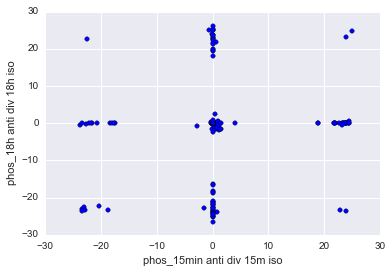

In [165]:
plt.scatter(dfphos2_ratios['phos_anti_div_iso_15m'], dfphos2_ratios['phos_anti_div_iso_18h'])
plt.xlabel('phos_15min anti div 15m iso')
plt.ylabel('phos_18h anti div 18h iso')

In [159]:
#preparing the 4 dataframe to merge by accession
dfphos_formatted = dfphos2_ratios
dfwp_formatted = dfwp2[['wp_15manti_div_15miso','wp_6hanti_div_6hiso', 'wp_18hanti_div_18hiso']]
dfGP_formatted = dfGP2[['GP_15manti_div_15miso','GP_6hanti_div_6hiso','GP_18hanti_div_18hiso']]
glycan_formatted = group3_pivot[['glycan_ratio_15m','glycan_ratio_6h','glycan_ratio_18h']]

In [160]:
df_merged = dfphos_formatted.join( dfwp_formatted, how='outer')
df_merged = df_merged.join(dfGP_formatted, how= 'outer')
df_merged = df_merged.join(glycan_formatted, how= 'outer')

In [161]:
df_merged['sum'] = df_merged.sum(1)
df_mergedsort = df_merged.sort(columns='sum', ascending= False)

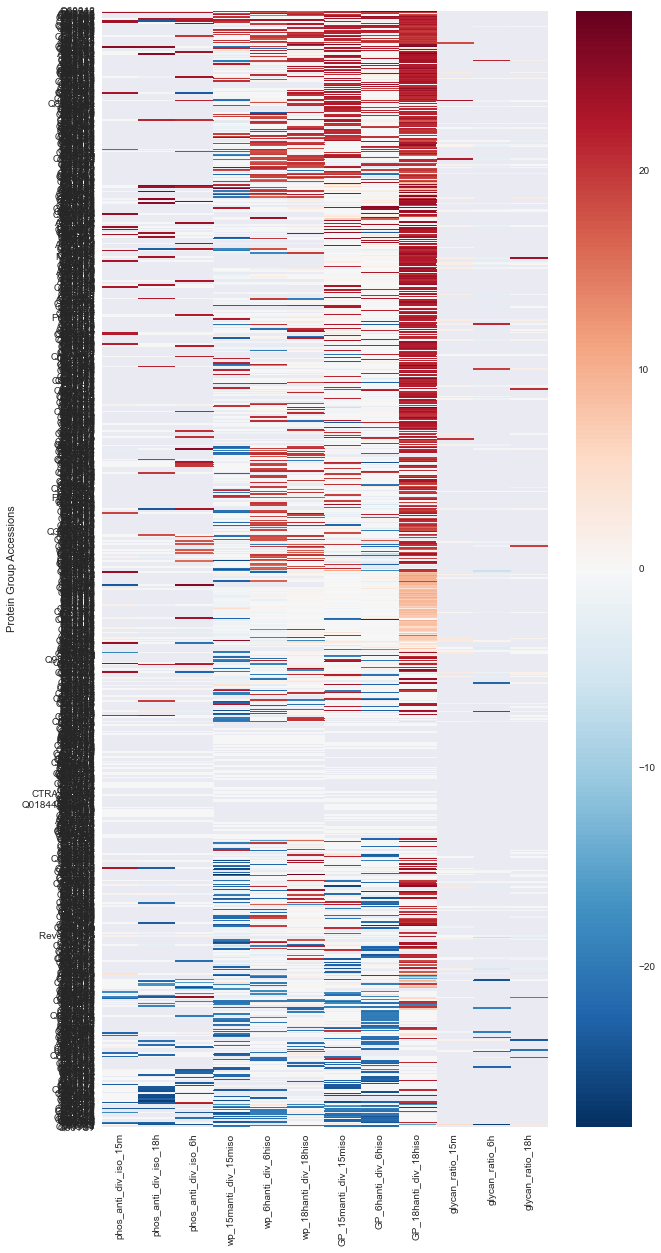

In [163]:
plt.figure(figsize=(10, 20))
seaborn.heatmap(df_mergedsort.iloc[:,:-1], xticklabels=True, yticklabels=True)

In [ ]:
#### Chart Pattern Analysis Belowc ####

In [115]:
cp = pd.read_excel(chartpattern,sheetname='Sheet1' )

In [116]:
cp.head(1)

,File Name,#,m/z,z,scan start,scan end,scan range,time,matches,amplitude,score
0,15m_iso_0,1,614.75,2,4911,5040,130,2829,25,6436275,103.30


In [117]:
cp2 = cp.copy()
cp2 = cp2.sort('score', ascending=False)
cp2 = cp2.reset_index()

#adding columns to initial data
cp2['m'] = cp2['m/z'] * cp2['z']
cp2['Version'] = cp2['File Name'].str[-1]
cp2['Trial'] = cp2['File Name'].str[:-2]
#old code to split File name into Version and Trial
#cp2 = cp2.join(pd.DataFrame(cp2['File name'].str.split('_',1).tolist(),columns = ['Trial','Version']))

#Christina's set conversion from scanrange to seconds
scanrange_to_time = 0.5
cp2['scan range (seconds)'] = scanrange_to_time * cp2['scan range']
cp2['time start'] = cp2['time'] - cp2['scan range (seconds)']
cp2['time end'] = cp2['time'] + cp2['scan range (seconds)']

cp2['Version'] = cp2['Version'].astype(int)


In [118]:
mz_limit = 0.01
score_floor = 50
cluster = []
cluster_file = []
agg_amplitude = np.zeros(cp2.shape[0])
agg_index = np.zeros(cp2.shape[0])
agg_index.fill(-1)
exceptions = []

for row in range(cp2.shape[0]):
    if row % 1000 == 0:
        print 'processing row {}'.format(row)
    mz_mask = np.abs(cp2['m/z'] - cp2.loc[row, 'm/z']) <= mz_limit
    z_mask = cp2['z'] == cp2.loc[row, 'z']
    scan_mask = (cp2['time start'] <= cp2.loc[row, 'time end']) | (cp2['time end'] >= cp2.loc[row, 'time start'])
    score_mask = cp2['score'] >= score_floor
    file_mask = cp2['File Name'] == cp2.loc[row, 'File Name']
    
    cluster_mask = (mz_mask & z_mask & scan_mask & score_mask)
    cluster_file_mask = (mz_mask & z_mask & scan_mask & score_mask & file_mask)
    
    cluster.append(cp2.index[cluster_mask].tolist())
    cluster_file.append(cp2.index[cluster_file_mask].tolist())
    
    #agg_index only calculates based off of cluster, which is conditioned from the 4 masks above
    if cluster_file[row]:
        if cluster_file[row][0] == row:
            agg_index[row] = cluster[-1][0]
            agg_amplitude[row] = cp2.ix[cluster_file[row],'amplitude'].sum()
    else:
        exceptions.append(row)
        #print cp2.loc[row, 'm/z'], cp2.loc[row, 'z'], cp2.loc[row, 'time end'], cp2.loc[row, 'time start']

processing row 0
processing row 1000
processing row 2000
processing row 3000
processing row 4000
processing row 5000
processing row 6000
processing row 7000
processing row 8000
processing row 9000
processing row 10000
processing row 11000
processing row 12000
processing row 13000
processing row 14000
processing row 15000
processing row 16000
processing row 17000
processing row 18000
processing row 19000
processing row 20000
processing row 21000
processing row 22000
processing row 23000
processing row 24000
processing row 25000
processing row 26000
processing row 27000
processing row 28000
processing row 29000


In [119]:
cp2['agg_amplitude'] = agg_amplitude
cp2['agg_index'] = agg_index
cp2['cluster'] = cluster
cp2['cluster_file'] = cluster_file
cp2['cluster_len'] = [len(row) for row in cp2['cluster']]

In [120]:
cp2.columns

Index([               u'index',            u'File Name',
                          u'#',                  u'm/z',
                          u'z',           u'scan start',
                   u'scan end',           u'scan range',
                       u'time',              u'matches',
                  u'amplitude',                u'score',
                          u'm',              u'Version',
                      u'Trial', u'scan range (seconds)',
                 u'time start',             u'time end',
              u'agg_amplitude',            u'agg_index',
                    u'cluster',         u'cluster_file',
                u'cluster_len'],
      dtype='object')

In [121]:
Counter(cp2['cluster_len'])

Counter({0: 15492, 1: 2722, 2: 1635, 3: 1343, 12: 1322, 4: 1111, 10: 653, 9: 649, 11: 646, 5: 644, 7: 613, 6: 569, 8: 547, 13: 408, 14: 313, 18: 139, 17: 107, 16: 102, 27: 81, 19: 79, 15: 62, 22: 60, 24: 57, 25: 48, 34: 47, 38: 47, 28: 37, 21: 24, 20: 22})

In [122]:
#checking that the cluster groups are consistent
#if row 10 cluster contains [10,21,48], that row 21 is also [10,21,48]
#found that it's largely true, 3160 of 3311 clusters are completely identical
#for non-identical, it's still not a major problem because comparisons of PMAI, or, control are still valid within the group
cp2['cluster_sum'] = [sum(row) for row in cp2['cluster']]
cp2.groupby(['agg_index','cluster_len']).count().to_excel('temp.xlsx')

In [123]:
cp2.Trial.unique()

array([u'18h_anti328', u'6h_iso', u'18h_iso', u'6h_anti328',
       u'15m_anti328', u'15m_iso'], dtype=object)

In [124]:
cp2_pivot = cp2.pivot_table(values='amplitude', index='agg_index', columns=['Trial','Version'],aggfunc='sum')

In [125]:
#determine the minimum value to substitute for the nan values
cp2[cp2['agg_amplitude']>0].groupby('File Name').min()['amplitude']

File Name
15m_anti328_0    71066
15m_anti328_1    21069
15m_iso_0        33064
15m_iso_1        50602
18h_anti328_0    20008
18h_anti328_1    22983
18h_iso_0        21106
18h_iso_1        46532
6h_anti328_0     53552
6h_anti328_1     22744
6h_iso_0         53776
6h_iso_1         29122
Name: amplitude, dtype: int64

In [126]:
#nan are undetectable amplitudes. setting to a minimum threshhold of 10,000
min_ampliltude = 1
cp3_pivot = cp2_pivot.fillna(min_ampliltude)

In [127]:
one = cp3_pivot.iloc[:,0:2]
two = cp3_pivot.iloc[:,2:4]
three = cp3_pivot.iloc[:,4:6]
four = cp3_pivot.iloc[:,6:8]
five = cp3_pivot.iloc[:,8:10]
six = cp3_pivot.iloc[:,10:12]

#hacky way to divide one column label with another
one_two_label = pd.MultiIndex(levels=[['15m'],[0,1]], labels=[[0,0], [0,1]], names=[u'Version', u'Trial'])
one_two = pd.DataFrame(data=(one.values / two.values),columns= one_two_label, index=cp3_pivot.index)

three_four_label = pd.MultiIndex(levels=[['18h'],[0,1]], labels=[[0,0], [0,1]], names=[u'Version', u'Trial'])
three_four = pd.DataFrame(data=(three.values / four.values), columns = three_four_label, index=cp3_pivot.index)

five_six_label = pd.MultiIndex(levels=[['6h'],[0,1]], labels=[[0,0], [0,1]], names=[u'Version', u'Trial'])
five_six = pd.DataFrame(data=(five.values / six.values),columns= five_six_label, index=cp3_pivot.index)

In [128]:
cp3_chg = pd.concat([one_two, three_four, five_six], axis=1).iloc[1:]

In [129]:
pd.concat([(cp3_chg < 1).sum(),(cp3_chg == 1).sum(),(cp3_chg > 1).sum()],axis=1)
# 0 means numerator < denominator
# 1 means numerator = denominator
# 2 means numerator > denominator

0    1    2
Version Trial               
15m     0      283  498  443
        1      176  662  386
18h     0      370  544  310
        1      327  712  185
6h      0      307  538  379
        1      239  698  287

In [130]:
#exact ratio of 1 means both numerator and denominator were NaN
cp3_chg = cp3_chg.replace(1,np.nan)

In [131]:
#this shows one specific group
cp2[cp2['agg_index'] == 14].sort('File Name').iloc[:,:-3]

,index,File Name,#,m/z,z,scan start,scan end,scan range,time,matches,...,score,m,Version,Trial,scan range (seconds),time start,time end,agg_amplitude,agg_index,cluster


In [132]:
#ratio between treatments
#log centers no change around zero, and makes the increase and decrease distribution roughly symmetrical
#without the log transform, the distribution of ratio is around 0, decrease is between 0 and 1, and increase
#is 1 to infinity

cp3_logchg = np.log(cp3_chg)
cp3_logchg.head()

Version     15m         18h          6h      
Trial         0     1     0     1     0     1
agg_index                                    
0.00      -0.17  0.82  0.22 -0.57  0.48 -0.08
1.00      -0.48 -0.23 -0.76 -0.86 -1.29 -0.70
2.00       0.22 -0.02 -0.13 -0.46  0.23 -0.29
3.00      -0.09  0.47 -0.28 -1.59 -0.12 -0.21
4.00       0.09  0.63 -1.18 -1.84 -0.08 -0.01

In [133]:
cp4_logchg= cp3_logchg.copy()
levels = cp4_logchg.columns.levels
labels = cp4_logchg.columns.labels
cp4_logchg.columns = levels[0][labels[0]]

In [134]:
#count of groups that increase/decrease, across all 4 trials
cp4_summary = pd.concat( [(cp4_logchg < 0).stack().reset_index().groupby('Version').sum().iloc[:,1], (cp4_logchg > 0).stack().reset_index().groupby('Version').sum().iloc[:,1]], axis=1)
cp4_summary.columns = ['decrease','increase']
cp4_summary

,decrease,increase
Version,,
15m,459.00,829.00
18h,697.00,495.00
6h,546.00,666.00


In [135]:
#once the treatments are in ratios, I can combine the 4 trials
#idiosyncratic factors cancel out
cp3_logchg_stack = pd.concat([
cp3_logchg.iloc[:, cp3_logchg.columns.get_level_values(0)=='15m'].stack(),
cp3_logchg.iloc[:, cp3_logchg.columns.get_level_values(0)=='18h'].stack(),
cp3_logchg.iloc[:, cp3_logchg.columns.get_level_values(0)=='6h'].stack(),],axis=1)

In [136]:
cp3_logchg_stack.describe()

,15m,18h,6h
count,1288.00,1192.00,1212.00
mean,1.83,-0.84,0.80
std,9.54,10.55,9.93
min,-17.78,-17.53,-16.68
25%,-0.28,-12.83,-1.29
50%,0.25,-0.33,0.09
75%,12.71,11.57,12.24
max,17.00,16.63,16.71


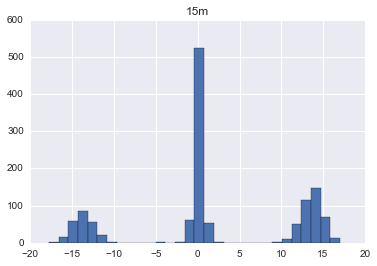

In [137]:
cp3_logchg_stack.iloc[:,0].hist( bins= 30)
plt.title(cp3_logchg_stack.columns[0])

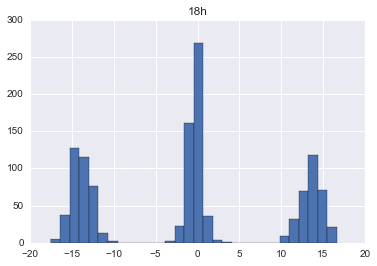

In [138]:
cp3_logchg_stack.iloc[:,1].hist( bins= 30)
plt.title(cp3_logchg_stack.columns[1])

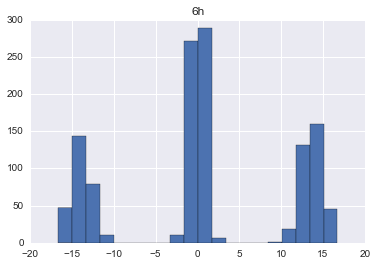

In [139]:
cp3_logchg_stack.iloc[:,2].hist( bins= 20)
plt.title(cp3_logchg_stack.columns[2])

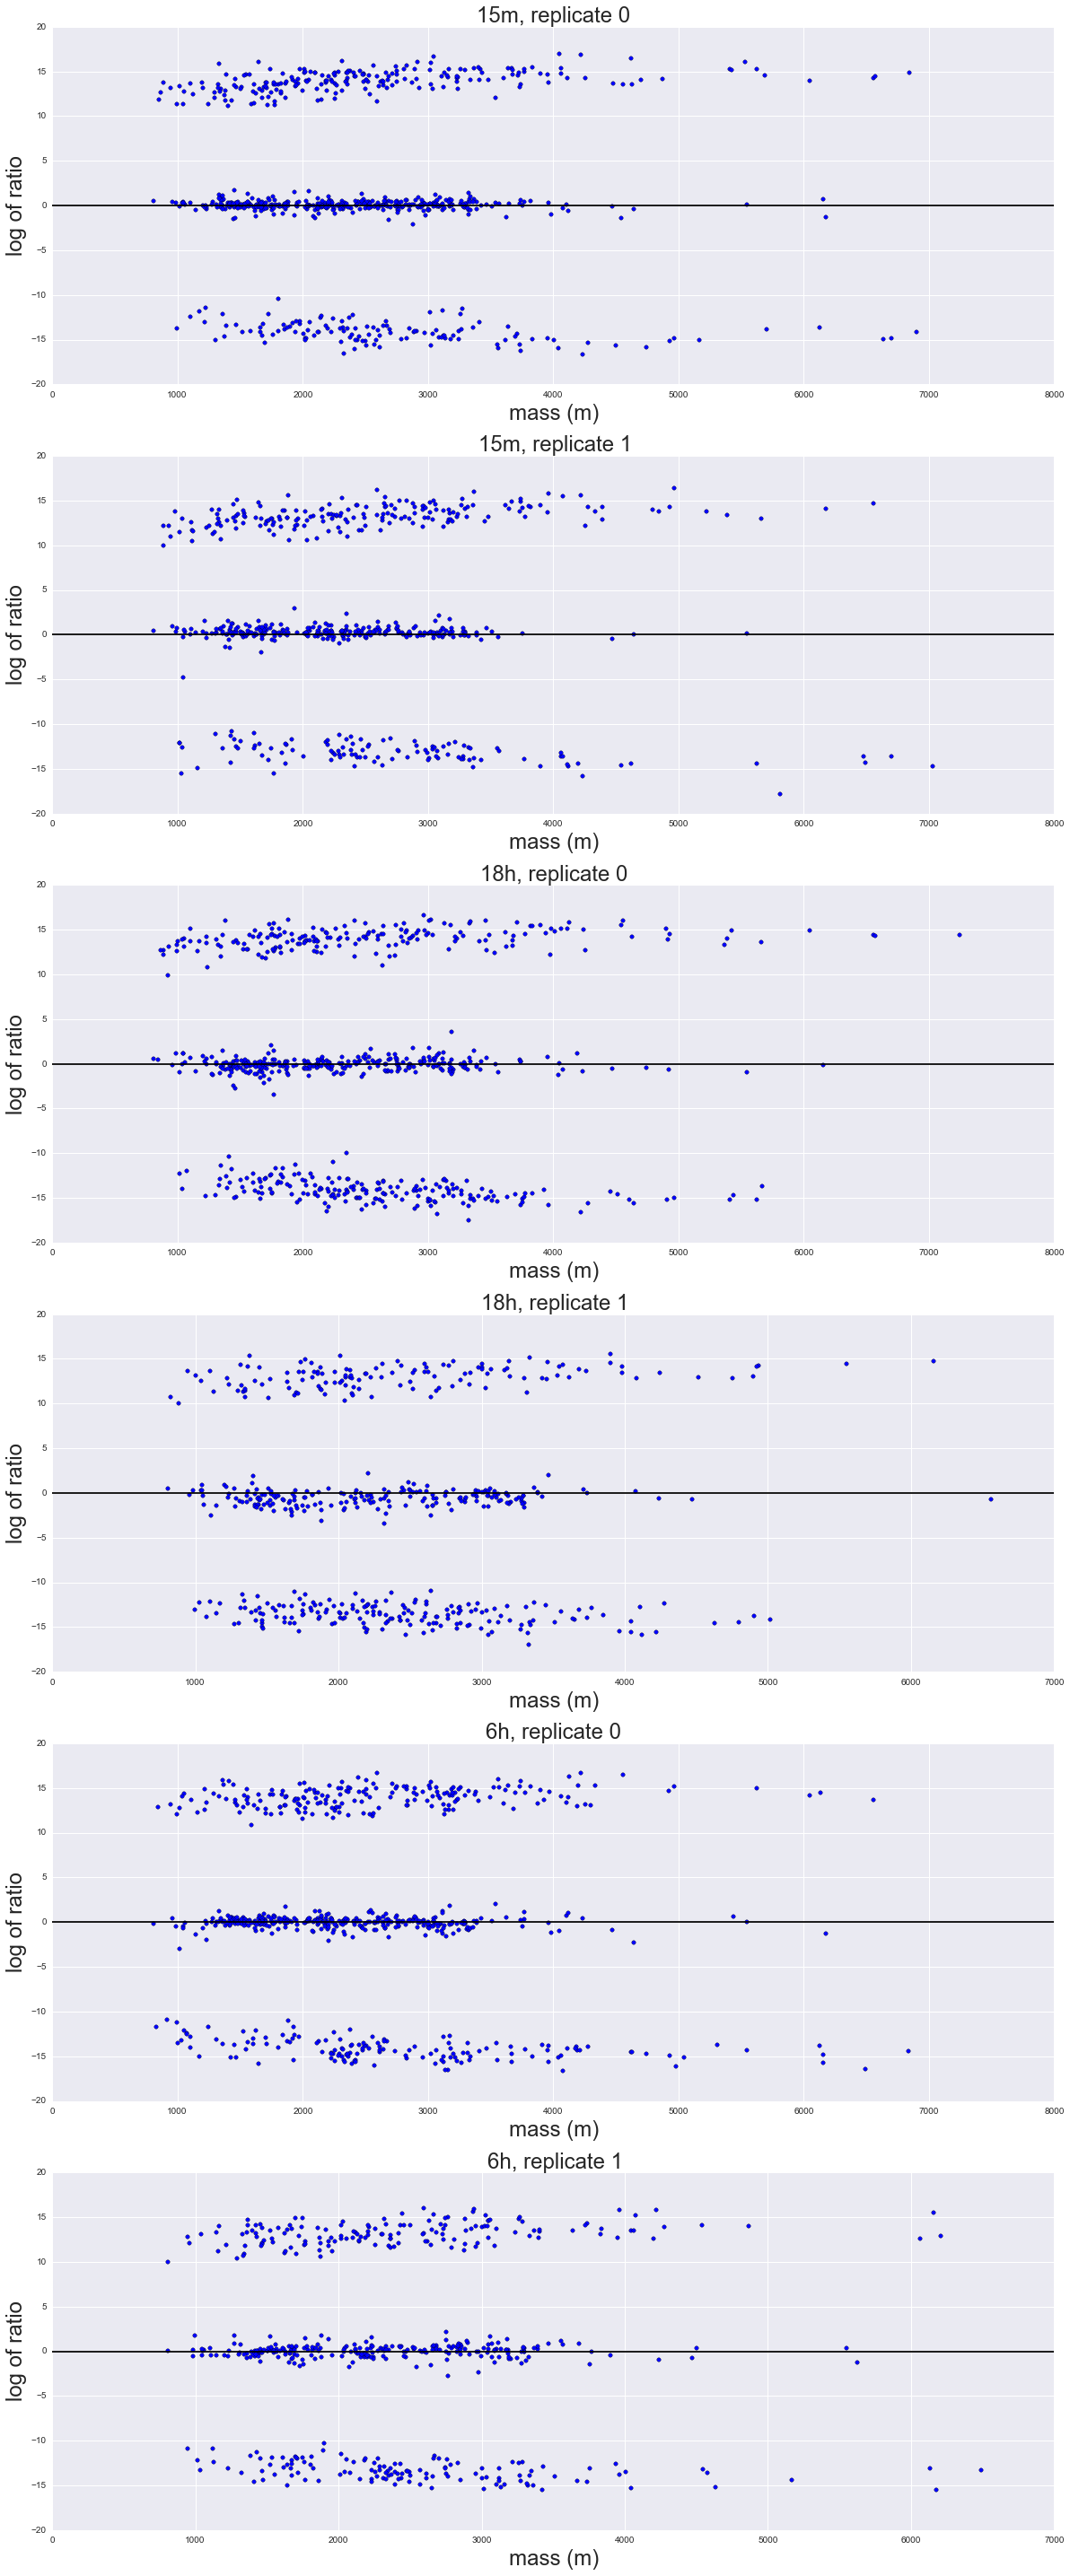

In [140]:
#plt.scatter(np.log(cp2.ix[cp3_chg.iloc[:,0].index]['m']), np.log(cp3_chg.iloc[:,0]))
#plt.title('{}, replicate {}'.format(*cp3_chg.columns[0]))
fig, axes = plt.subplots(6,1, figsize=(20, 50))
for idx in range(6):
    axes[idx].scatter(cp2.ix[cp3_chg.iloc[:,idx].index]['m'], np.log(cp3_chg.iloc[:,idx]))
    axes[idx].set_xlabel('mass (m)', fontdict = {'fontsize':24})
    axes[idx].set_ylabel('log of ratio', fontdict = {'fontsize':24})
    axes[idx].set_title('{}, replicate {}'.format(*cp3_chg.columns[idx]), fontdict = {'fontsize':24})
    axes[idx].axhline(c='black')

In [141]:
cp2.ix[cp2.loc[1,'cluster'],:-1]

,index,File Name,#,m/z,z,scan start,scan end,scan range,time,matches,...,Version,Trial,scan range (seconds),time start,time end,agg_amplitude,agg_index,cluster,cluster_file,cluster_len
1,13211,6h_iso_1,1,1039.80,3,6336,6420,85,4460,16,...,1,6h_iso,42.50,4417.50,4502.50,43480198.00,1.00,"[1, 13, 22, 35, 36, 69, 81, 94, 97, 116, 117, ...",[1],12
13,10302,6h_iso_0,1,1039.80,3,7231,7340,110,4427,21,...,0,6h_iso,55.00,4372.00,4482.00,153396839.00,1.00,"[1, 13, 22, 35, 36, 69, 81, 94, 97, 116, 117, ...",[13],12
22,14967,6h_anti328_0,1,1039.80,3,7091,7180,90,4386,17,...,0,6h_anti328,45.00,4341.00,4431.00,42336858.00,1.00,"[1, 13, 22, 35, 36, 69, 81, 94, 97, 116, 117, ...",[22],12
35,4933,15m_anti328_0,2,1039.80,3,7116,7205,90,4409,17,...,0,15m_anti328,45.00,4364.00,4454.00,47194018.00,1.00,"[1, 13, 22, 35, 36, 69, 81, 94, 97, 116, 117, ...",[35],12
36,1,15m_iso_0,2,1039.80,3,7111,7195,85,4452,16,...,0,15m_iso,42.50,4409.50,4494.50,76033850.00,1.00,"[1, 13, 22, 35, 36, 69, 81, 94, 97, 116, 117, ...",[36],12
69,8285,15m_anti328_1,9,1039.80,3,6351,6435,85,4458,16,...,1,15m_anti328,42.50,4415.50,4500.50,17569259.00,1.00,"[1, 13, 22, 35, 36, 69, 81, 94, 97, 116, 117, ...",[69],12
81,23010,18h_iso_1,7,1039.80,3,6336,6420,85,4435,16,...,1,18h_iso,42.50,4392.50,4477.50,12651555.00,1.00,"[1, 13, 22, 35, 36, 69, 81, 94, 97, 116, 117, ...",[81],12
94,3112,15m_iso_1,6,1039.80,3,6196,6270,75,4431,14,...,1,15m_iso,37.50,4393.50,4468.50,22162703.00,1.00,"[1, 13, 22, 35, 36, 69, 81, 94, 97, 116, 117, ...",[94],12
97,19903,18h_iso_0,10,1039.80,3,7301,7395,95,4442,18,...,0,18h_iso,47.50,4394.50,4489.50,36914098.00,1.00,"[1, 13, 22, 35, 36, 69, 81, 94, 97, 116, 117, ...",[97],12
116,24893,18h_anti328_0,7,1039.80,3,7296,7370,75,4384,14,...,0,18h_anti328,37.50,4346.50,4421.50,17271590.00,1.00,"[1, 13, 22, 35, 36, 69, 81, 94, 97, 116, 117, ...",[116],12


In [142]:
#unique rows that show up in cluster
import itertools
ab = itertools.chain(*cluster)
unique_data = set(ab)

In [143]:
#These values should be the same. slight difference, but magnitude is small enough that i'm not investigating for now

print 'amplitude filtered for unique cluster values: {}'.format(cp2.loc[unique_data]['amplitude'].sum())
print 'aggregate amplitude: {}'.format(cp2['agg_amplitude'].sum())

amplitude filtered for unique cluster values: 29781693162
aggregate amplitude: 29781693162.0


In [144]:
#aggregate cluster amplitude if it's also in the same file
cp2['amplitude']

0          1632433
1         43480198
2          5886938
3          1282956
4          3259655
5          1429587
6           463264
7          8281695
8          6942864
9          4749195
10         4317569
11        15014850
12         2058636
13       153396839
14         1489115
15         1100558
16         7684029
17         5190492
18       117099960
19        14945950
20        13955680
21         1648002
22        42336858
23         6947732
24        28770935
25         6436275
26        26415806
27         7220420
28         7109402
29         1514215
           ...    
29549        27623
29550        52089
29551        36053
29552       134515
29553       438771
29554       176736
29555        30681
29556       170485
29557       218435
29558       920804
29559       175559
29560        47536
29561       420782
29562       238867
29563        35482
29564       245761
29565       133333
29566       963377
29567        93541
29568        62011
29569        74712
29570       

In [145]:
#cp2.ix[cp2.loc[0,'cluster'],:-1].to_excel('temp0.xlsx')
#cp2.ix[cp2.loc[1,'cluster'],:-1].to_excel('temp1.xlsx')
#cp2.ix[cp2.loc[1,'cluster']].to_excel('temp2.xlsx')

In [146]:
cp2_name = sorted(cp2['File Name'].unique())
cp2_name

[u'15m_anti328_0',
 u'15m_anti328_1',
 u'15m_iso_0',
 u'15m_iso_1',
 u'18h_anti328_0',
 u'18h_anti328_1',
 u'18h_iso_0',
 u'18h_iso_1',
 u'6h_anti328_0',
 u'6h_anti328_1',
 u'6h_iso_0',
 u'6h_iso_1']

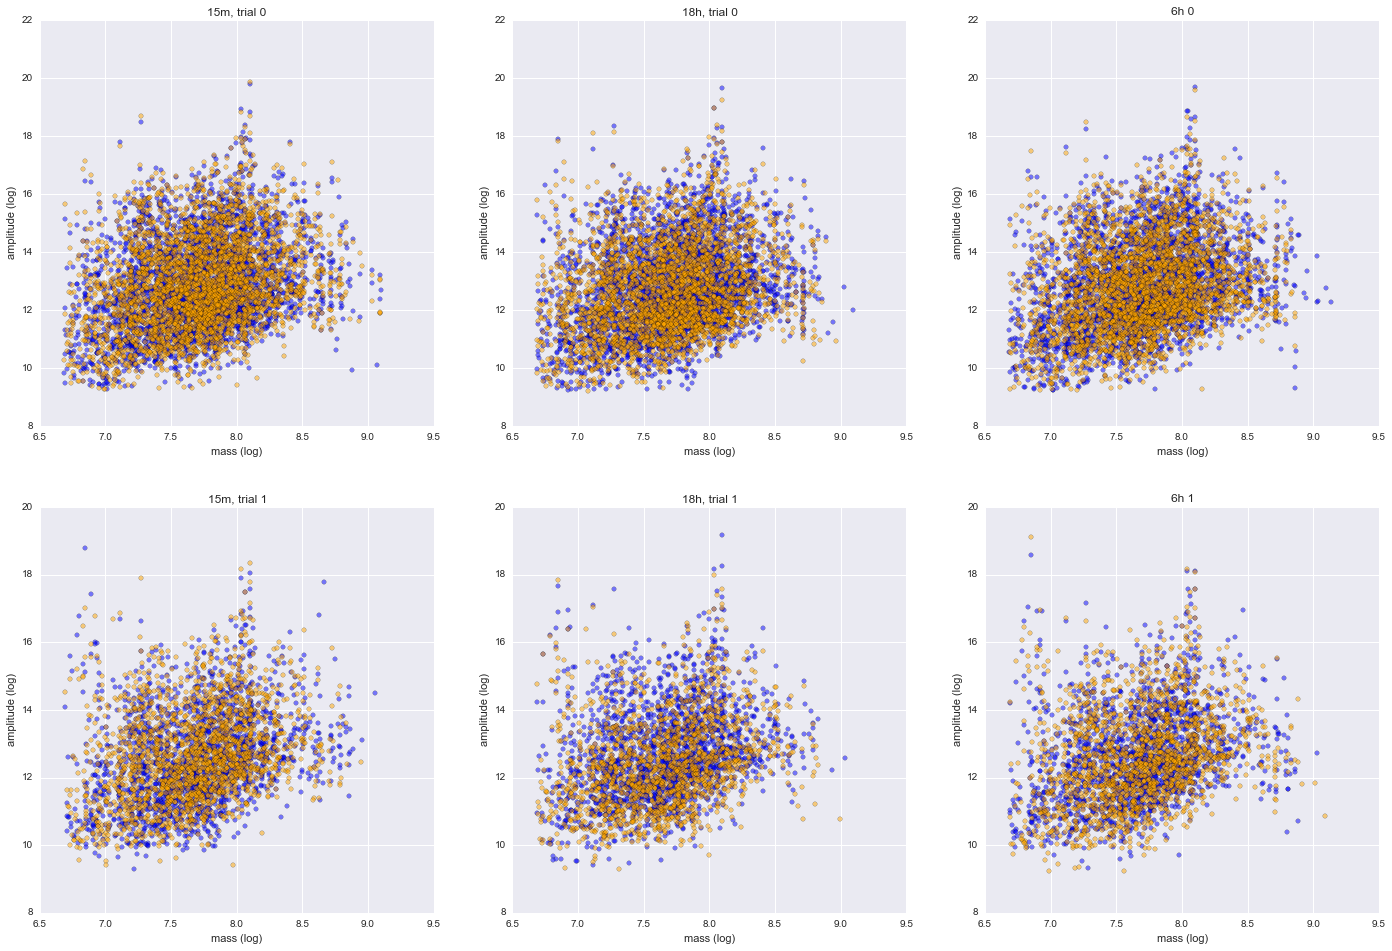

In [147]:

fig, axes = plt.subplots(2,3, figsize=(24, 16))
for idx in range(2):
    #IMPORTANT! Assumes that the cp2 name is 12 in length.
    #15 min anti versus iso
    axes[idx, 0].scatter( np.log(cp2[cp2['File Name'] == cp2_name[idx + 2]]['m']), np.log(cp2[cp2['File Name'] == cp2_name[idx + 2]]['amplitude']),c='b', alpha = 0.5)
    axes[idx, 0].scatter( np.log(cp2[cp2['File Name'] == cp2_name[idx]]['m']), np.log(cp2[cp2['File Name'] == cp2_name[idx ]]['amplitude']), c='orange', alpha = 0.5)
    axes[idx, 0].set_title('15m, trial {}'.format(idx))
    axes[idx, 0].set_xlabel('mass (log)')
    axes[idx, 0].set_ylabel('amplitude (log)')
    
    #18h anti versus iso
    axes[idx, 1].scatter( np.log(cp2[cp2['File Name'] == cp2_name[idx + 6]]['m']), np.log(cp2[cp2['File Name'] == cp2_name[idx + 6]]['amplitude']),c='b',alpha = 0.5)
    axes[idx, 1].scatter( np.log(cp2[cp2['File Name'] == cp2_name[idx + 4]]['m']), np.log(cp2[cp2['File Name'] == cp2_name[idx + 4]]['amplitude']), c='orange',alpha = 0.5,)
    axes[idx, 1].set_title('18h, trial {}'.format(idx))
    axes[idx, 1].set_xlabel('mass (log)')
    axes[idx, 1].set_ylabel('amplitude (log)')
    
    #6h anti versus iso
    axes[idx, 2].scatter( np.log(cp2[cp2['File Name'] == cp2_name[idx + 10]]['m']), np.log(cp2[cp2['File Name'] == cp2_name[idx + 10]]['amplitude']),c='b',alpha = 0.5,)
    axes[idx, 2].scatter( np.log(cp2[cp2['File Name'] == cp2_name[idx + 8]]['m']), np.log(cp2[cp2['File Name'] == cp2_name[idx + 8]]['amplitude']), c='orange',alpha = 0.5,)
    axes[idx, 2].set_title('6h {}'.format(idx))
    axes[idx, 2].set_xlabel('mass (log)')
    axes[idx, 2].set_ylabel('amplitude (log)')

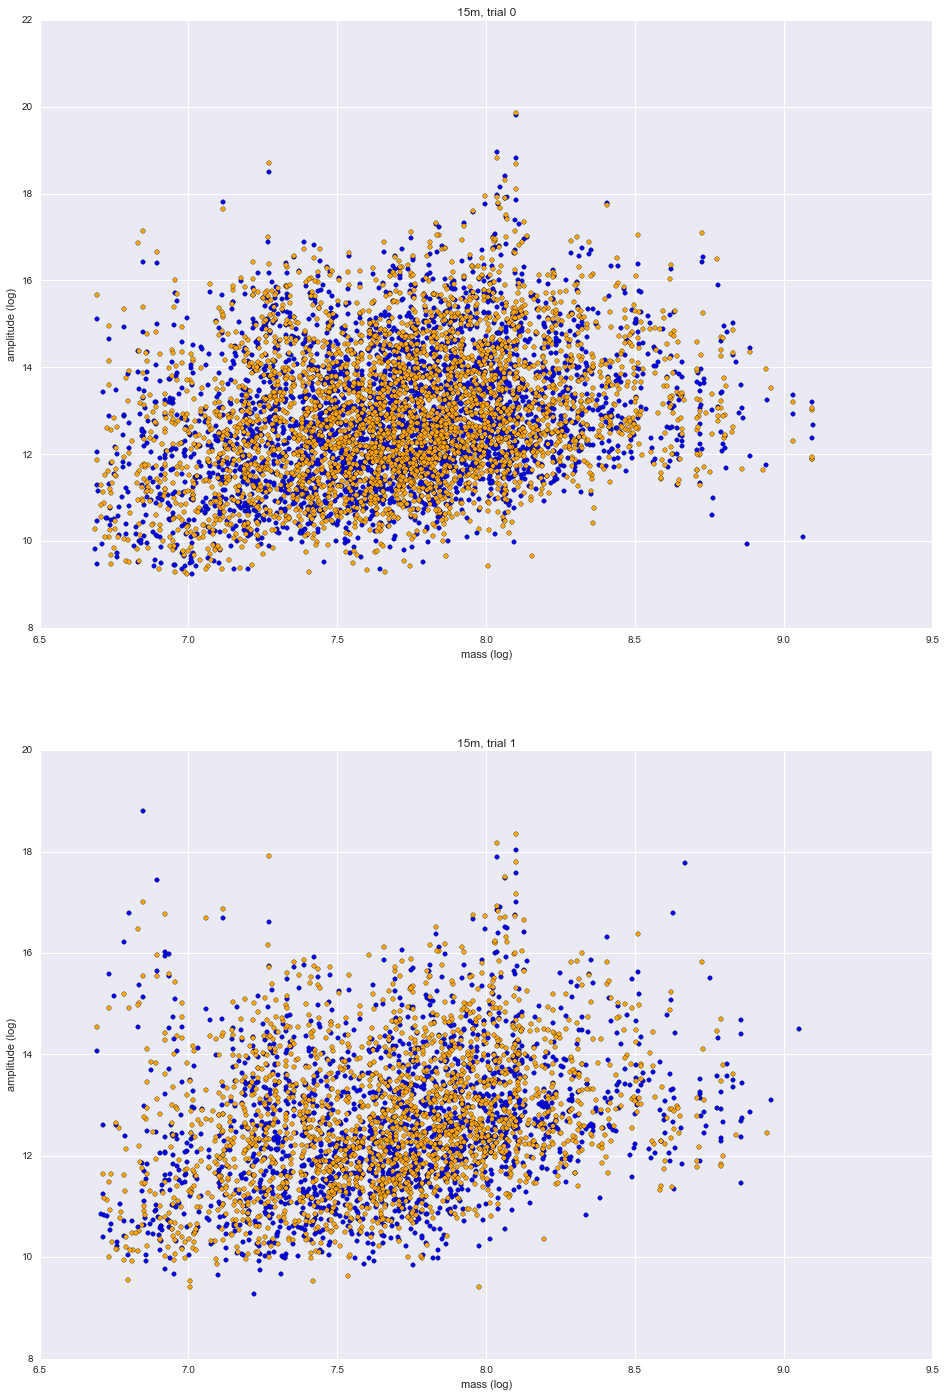

In [148]:
#full size zoom of comparison
fig, axes = plt.subplots(2,1, figsize=(16, 24))
for idx in range(2):

    axes[idx].scatter( np.log(cp2[cp2['File Name'] == cp2_name[idx + 2]]['m']), np.log(cp2[cp2['File Name'] == cp2_name[idx + 2]]['amplitude']),c='b')
    axes[idx].scatter( np.log(cp2[cp2['File Name'] == cp2_name[idx]]['m']), np.log(cp2[cp2['File Name'] == cp2_name[idx ]]['amplitude']), c='orange')
    axes[idx].set_title('15m, trial {}'.format(idx))
    axes[idx].set_xlabel('mass (log)')
    axes[idx].set_ylabel('amplitude (log)')
    

In [149]:
cp2_version = sorted(cp2['Version'].unique())
cp2_version

[0, 1]

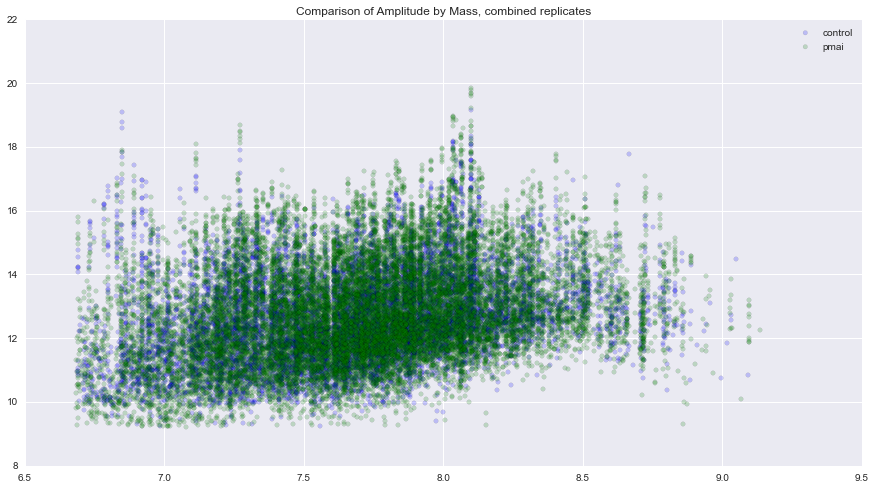

In [150]:
plt.figure(figsize=(15,8))

plt.scatter( np.log(cp2[cp2['Version'] == cp2_version[1]]['m']), np.log(cp2[cp2['Version'] == cp2_version[1]]['amplitude']),c='b', alpha = 0.2, label = 'control')
plt.scatter( np.log(cp2[cp2['Version'] == cp2_version[0]]['m']), np.log(cp2[cp2['Version'] == cp2_version[0]]['amplitude']), c='g', alpha = 0.2, label = 'pmai')
plt.legend()
plt.title('Comparison of Amplitude by Mass, combined replicates')